# Analysis of Wealthfront Portfolios

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

from fintools import *

C:\Users\dimitri\workspaces\opensource\finance-toolbox


Wealth front uses ETFs from Vanguard and Schwab to cover large market sectors.
Here we compare the corresponding ETFs for the US Market

In [2]:
from fintools. price_data import load_daily_prices

vti_prices = load_daily_prices(['VTI', 'SCHB'], '2018-01-01', '2021-12-31')
vti_prices.head()

Attributes   Adj Close                  Close                   High  \
Symbols            VTI       SCHB         VTI       SCHB         VTI   
Date                                                                   
2018-01-02  128.636459  30.156090  138.220001  32.494999  138.229996   
2018-01-03  129.380997  30.323137  139.020004  32.674999  139.100006   
2018-01-04  129.874237  30.439135  139.550003  32.799999  139.809998   
2018-01-05  130.637405  30.634020  140.369995  33.009998  140.440002   
2018-01-08  130.935211  30.703621  140.690002  33.084999  140.770004   

Attributes                    Low                   Open             \
Symbols          SCHB         VTI       SCHB         VTI       SCHB   
Date                                                                  
2018-01-02  32.494999  137.440002  32.330002  137.750000  32.384998   
2018-01-03  32.700001  138.300003  32.520000  138.389999  32.535000   
2018-01-04  32.865002  139.350006  32.764999  139.419998  32.775002   
2018-01-05  33.025002  139.720001  32.845001  140.020004  32.919998   
2018-01-08  33.099998  140.100006  32.945000  140.309998  33.000000   

Attributes     Volume             
Symbols           VTI       SCHB  
Date                              
2018-01-02  3699700.0  1277400.0  
2018-01-03  3052300.0  1451000.0  
2018-01-04  2572400.0  2558000.0  
2018-01-05  2188500.0  1164200.0  
2018-01-08  2655300.0  1373800.0

In [3]:
vti_prices['Adj Close'].head()

Symbols,VTI,SCHB
Date,,
2018-01-02,128.636459,30.156090
2018-01-03,129.380997,30.323137
2018-01-04,129.874237,30.439135
2018-01-05,130.637405,30.634020
2018-01-08,130.935211,30.703621


array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

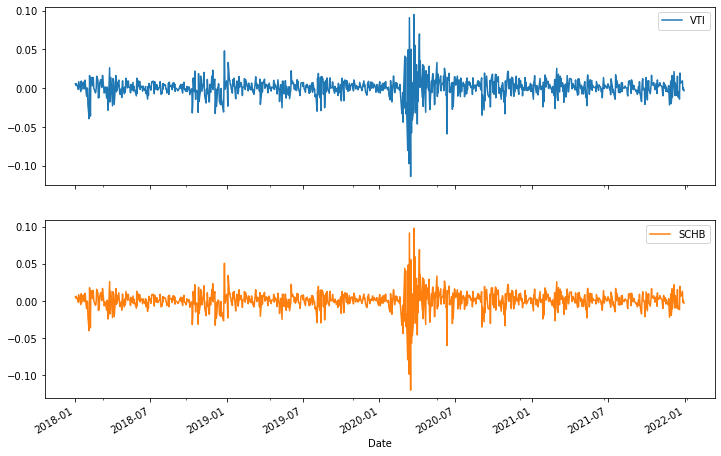

In [4]:
from fintools.calculator import compute_returns


vti_returns = compute_returns(vti_prices['Close'])
vti_returns.plot(subplots=True, layout=(2,1), figsize=(12,8))

In [5]:
vti_prices['Close'].corr()

Symbols,VTI,SCHB
Symbols,,
VTI,1.000000,0.999962
SCHB,0.999962,1.000000


They seem to be very similar indeed

## Portfolio Analysis

Now we look at the constituents of the WF portflio and examine historical returns and correlations

In [6]:
wf_stocks = ['VTI','VEA','VWO','VTEB', 'VIG', 'VDE']
wf_prices = load_daily_prices(wf_stocks, '2018-01-01', '2021-12-31')['Adj Close']
wf_prices.head()

Symbols,VTI,VEA,VWO,VTEB,VIG,VDE
Date,,,,,,
2018-01-02,128.636475,40.145191,41.791473,47.310516,94.647041,85.608887
2018-01-03,129.380997,40.393597,42.194176,47.319691,95.081520,86.909195
2018-01-04,129.874252,40.757355,42.453697,47.255501,95.441994,87.376633
2018-01-05,130.637405,40.952534,42.829540,47.319691,96.153770,87.351143
2018-01-08,130.935226,40.934795,42.838486,47.319691,96.431107,87.844070


<AxesSubplot:xlabel='Date'>

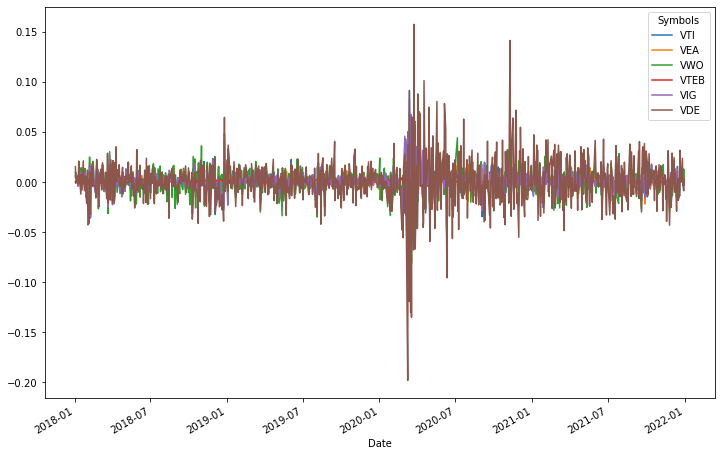

In [7]:
wf_returns = compute_returns(wf_prices)
wf_returns.plot(figsize=(12,8))

In [8]:
wf_returns.corr()

Symbols,VTI,VEA,VWO,VTEB,VIG,VDE
Symbols,,,,,,
VTI,1.000000,0.906554,0.805721,0.255874,0.962955,0.719579
VEA,0.906554,1.000000,0.861845,0.298858,0.873347,0.741453
VWO,0.805721,0.861845,1.000000,0.275983,0.744721,0.625630
VTEB,0.255874,0.298858,0.275983,1.000000,0.226207,0.167406
VIG,0.962955,0.873347,0.744721,0.226207,1.000000,0.670117
VDE,0.719579,0.741453,0.625630,0.167406,0.670117,1.000000


They look pretty correlated...

## Performance

In [9]:
from fintools.portfolio import *
wf_weights = [.35, .22, .17, .13, .8, .5]
wf_portfolio = compute_portfolio_return(weights=wf_weights, returns=wf_returns)
wf_portfolio.head()

Date
2018-01-03    0.016317
2018-01-04    0.009907
2018-01-05    0.010612
2018-01-08    0.005867
2018-01-09    0.002045
dtype: float64

<AxesSubplot:xlabel='Date'>

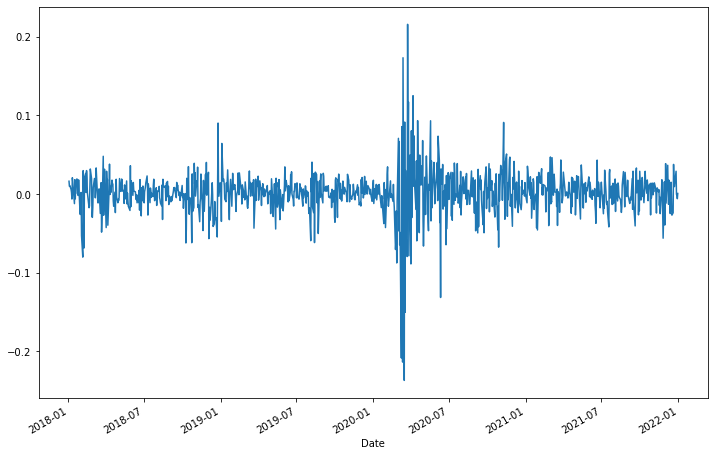

In [10]:
wf_portfolio.plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

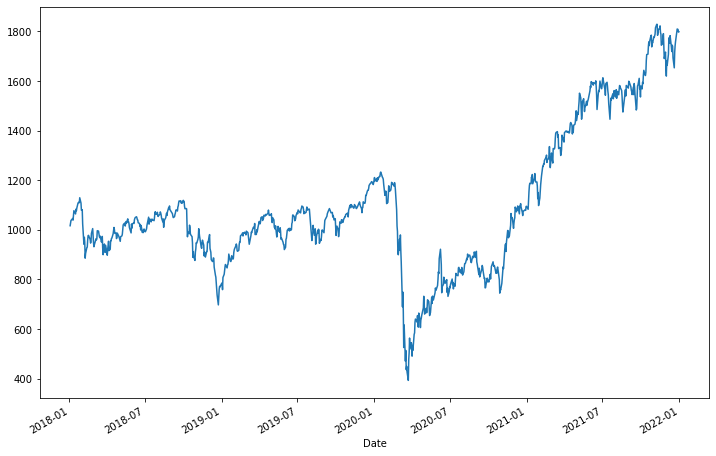

In [24]:
import matplotlib.pyplot as plt
from fintools.calculator import *


values = compute_value(wf_portfolio, initial_value=1000)
values.plot(figsize=(12,8))

In [16]:
from fintools.metrics import *
collect_metrics(wf_portfolio)

compound_return           0.798123
annualized_return         0.007016
annualized_volatility     0.098657
skewness                 -0.938398
excess_kurtosis          16.919544
cornish_fisher_var        0.043216
historic_var              0.040972
conditional_var           0.069493
sharpe_ratio              0.071120
max_drawdown             -0.681395
dtype: float64

<AxesSubplot:title={'center':'Drawdown'}, xlabel='Date'>

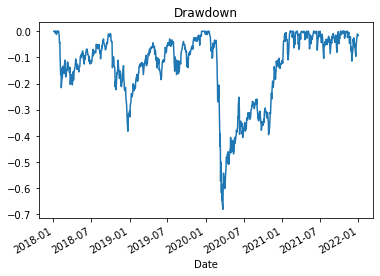

In [12]:
drawdown = compute_drawdown(wf_portfolio)
drawdown.drawdowns.plot(title='Drawdown')

For comparison, let's compute the minimum variance portfolio for the same stocks

In [13]:
mv_weights = global_minimum_variance_portfolio(wf_returns.cov())
np.around(mv_weights,decimals=3)

array([0.   , 0.   , 0.   , 0.956, 0.044, 0.   ])

In [14]:
mv_portfolio = compute_portfolio_return(weights=mv_weights, returns=wf_returns)
collect_metrics(mv_portfolio)

compound_return            0.182759
annualized_return          0.002002
annualized_volatility      0.014814
skewness                  -3.690527
excess_kurtosis          111.513824
cornish_fisher_var         0.000623
historic_var               0.002155
conditional_var            0.007027
sharpe_ratio               0.135152
max_drawdown              -0.166688
dtype: float64